*Data Classification using the Perceptron from the standard Scikit-Learn library sklearn* [sklearn](http://scikit-learn.org/stable/modules/classes.html)

# scikit-learn - Training the Perceptron

scikit-learn provides a ready dataset of iris flower features consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.

Here is what each column of the iris dataset is divided into
column 1 - sepal length
column 2 - sepal width
column 3 - petal length
column 4 - petal width

The flower classes are already converted into integer labels with
0 : Iris-Setosa,
1 : Iris-Versicolor
2 : Iris-Virginica

Using integer labels improves the computational efficiency of the algorithm due to a smaller memory footprint and also such encoding of the class labels as integers is a common convention among many machine learning libraries.

Load the necessary libraries and the iris dataset.

In [3]:
import numpy as np
from sklearn.datasets import load_iris

from IPython.display import display, Math, Latex

# now fetch the iris data set
iris = load_iris()

# list the feature names
print("feature names: {}".format(list(iris.feature_names)))

# list the target names
print("target names: {}".format(list(iris.target_names)))

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa', 'versicolor', 'virginica']


Now assign the iris dataset to variables so that we can continue with the training and classification

In [4]:
# assign the data to variables
X = iris.data[:, [2, 3]]
y = iris.target

# get the unique class labels from the target
print('unique target class labels: {}'.format(np.unique(y)))

unique target class labels: [0 1 2]


Now, as a part of the training the model inorder the verify how good our model performs we can split the dataset into separate training and test datasets. Once the model is trained on the training dataset, the same may be validated using the test dataset. Here we are going to use the scikit-learn provided [splitter function] (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) to split the dataset.

We shall split the data in the ration of 70% for training and 30% for test dataset.

In [5]:
from sklearn.model_selection import train_test_split

# The function would shuffle the data before splitting the same.
# If we do not want it to be shuffled, specify the argument,
# shuffle=False in the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

The `stratify=y` specified in the function ensures that the training and testing datasets have the same proportion of class labels as the input dataset.

The `numpy` provided function `bincount` can give us details about the number of occurrences of each value in a collection.

In [6]:
print('Count of Labels in y: ', np.bincount(y))
print('Count of Labels in y_train: ', np.bincount(y_train))
print('Count of Labels in y_test: ', np.bincount(y_test))

Count of Labels in y:  [50 50 50]
Count of Labels in y_train:  [35 35 35]
Count of Labels in y_test:  [15 15 15]


## Standardizing the features

While training machine learning algorithms, one of the techniques that will speed up your trainings is if your features are scaled. Most of the machine learning algorithms would need standardization or feature scaling before being fed for training.

`scikit-learn` provides 3 feature scaling methods as below.

- StandardScaler
- MinMaxScaler
- RobustScaler

*StandardScaler*

The `StandardScaler` assumes that your data is normally distributed within each feature, and it'll scale them such that the distribution is now defined as below:

- centered around 0
- with a standard deviation of 1.

The mean and standard deviation are separately calculated for the feature, and the feature is then scaled based on the below formula:

$${x_i - mean(x)} \over {stddev(x)}$$

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# compute the mean and std to be used for later scaling
scaler.fit(X_train)
# perform standardization by centering and scaling
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
# compute the mean value
print('Mean of the training data: ', scaler.mean_)

Mean of the training data:  [3.78952381 1.19714286]


## Now train the Perceptron using the `scikit-learn`

Using the [Perceptron] (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) model as defined by the `scikit-learn`

In [8]:
from sklearn.linear_model import Perceptron

# assign the Perceptron as a classifier
clf = Perceptron(max_iter=40, eta0=0.1, random_state=1)
clf.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

### Predict class labels for samples in X_test_std

In [9]:
y_pred = clf.predict(X_test_std)
print('Number of samples Misclassified: %d' % (y_test != y_pred).sum())

Number of samples Misclassified: 9


### Calculation of the Accuracy Classification Score

Here we compute the subset accuracy, which is a means to check if the entire set of labels predicted for a sample match with the true set of labels.
If it matches, the accuracy is 1.0; otherwise it is 0.0.

In [10]:
from sklearn.metrics import accuracy_score, mean_squared_error, explained_variance_score

acs = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("\n**** Model Performance ****")
print('Accuracy Score: %.2f' % acs)
print('Mean Square Error: %.4f' % mse)
print('Explained variance score: %.4f' % evs)


**** Model Performance ****
Accuracy Score: 0.80
Mean Square Error: 0.2000
Explained variance score: 0.7600


Get the mean accuracy on the given test dataset and test labels

In [12]:
print('Mean Accuracy: %.2f' % clf.score(X_test_std, y_test))

Mean Accuracy: 0.80


### Plotting the decision boundary

In [11]:
import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap

def create_meshgrid(x, y, margin=1, step=0.02):
    """Create a numoy rectangular meshgrid out of an array of
    x values and an array of y values

    :x: array-like point x
    :y: array-like point y
    :margin: (int) boundary acts as a buffer
    :step: (float) stepping the values, default = 0.02

    Examples
    --------
    x = np.array([0, 1, 2, 3, 4])
    y = np.array([0, 1, 2, 3, 4])
    xx,yy=np.meshgrid(x,y)
    plt.plot(xx,yy, marker='.', color='k',linestyle='none')

    """
    x_min, x_max = x.min() - margin, x.max() + margin
    y_min, y_max = y.min() - margin, y.max() + margin
    # for plotting the boundaries, we need to evaluate the
    # function across a grid of points and plot it
    # default step size for mesh grid is 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    return xx, yy


def plot_decision_boundary(X, y, classifier, margin=1, step_size=0.01, test_index=None):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = create_meshgrid(X0, X1, margin, step_size)

    mesh = np.array([xx.ravel(), yy.ravel()])
    # print("np.array: {}", format(mesh))
    # here the x_values and y_values will now hold the grid
    # of points where the function will be evaluated
    mesh_output = classifier.predict(mesh.T)
    mesh_output = mesh_output.reshape(xx.shape)
    
    # pick a color scheme
    # plt.pcolormesh(xx, yy, mesh_output, cmap=plt.cm.gray)
    plt.contourf(xx, yy, mesh_output, alpha=0.3, cmap=plt.cm.gray)
    # plt.contourf(xx, yy, mesh_output, alpha=0.3, cmap=cmap)

    # now do an overlay of the training coordinates over the mesh
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks((np.arange(int(min(X[:, 0]) - 1), int(max(X[:, 0]) + 1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1]) - 1), int(max(X[:, 1]) + 1), 1.0)))
    
    # plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolor='yellow', linewidth=1, cmap=plt.cm.Paired)
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    marker=markers[i], 
                    label=cl, 
                    edgecolor='purple')

        
    # highlight the test samples after plotting
    if test_index:
        # plot all samples
        X_test, y_test = X[test_index, :], y[test_index]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='purple',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test dataset')

Now train the perceptron model using the standardized training data:

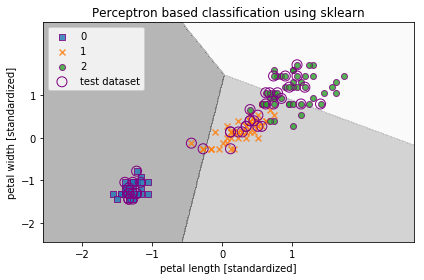

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_boundary(X=X_combined_std,
                       y=y_combined,
                       classifier=clf,
                       test_index=range(105, 150))

title = ('Perceptron based classification using sklearn')
plt.title(title)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

As evident from the above figure the three flower classes could not be perfectly sperated by a linear decision boundary. Infact the `Perceptron` model never converges on datasets which aren't perfectly lineary seperable, which is the reason why the usage of `Perceptron` algorithm is typically not recommended in practice.